In [ ]:
import numpy as np
weights = [50,60,70,]
heights_cm =[150,160,170]
heights_m=[1.5,1.6,1.7]
cov_cm = np.cov(heights_cm,weights)
cov_m = np.cov(heights_m,weights)
print(cov_cm)
print(cov_m)

[[100. 100.]
 [100. 100.]]
[[1.e-02 1.e+00]
 [1.e+00 1.e+02]]


In [ ]:
corr_cm = np.corrcoef(heights_cm,weights)
corr_m = np.corrcoef(heights_m,weights)
print(corr_cm)
print(corr_m)

[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]


In [ ]:
(126+128+128+130+130)/5

128.4

In [ ]:
(78+80+82+82+84)/5

81.2

In [ ]:
((2.4)**2+0.4**2+0.4**2+1.6**2+1.6**2)/4

2.8000000000000003

In [ ]:
(3.2**2+1.2**2+0.8**2+0.8**2+2.8**2)/4

5.2

In [ ]:
(-2.4*-3.2+-0.4*-1.2+-0.4*0.8+1.6*0.8+1.6*2.8)/4

3.4000000000000004

In [ ]:
2.8*5.2

14.559999999999999

In [ ]:
3.4 **2

11.559999999999999

In [ ]:
coefficients = [1,-8,3]
roots = np.roots(coefficients)
print(roots)

[7.60555128 0.39444872]


In [ ]:
3.4/4.8

0.7083333333333334

In [ ]:
1/np.sqrt(1+0.708**2)

np.float64(0.8161527809679515)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
#setup the data
data = pd.DataFrame({'H':[126,128,128,130,130],'W':[78,80,82,82,84],'Gender':['F','F','M','M','F']})
X = data[['H','W']]
X

,H,W
0,126,78
1,128,80
2,128,82
3,130,82
4,130,84


In [ ]:
X_mean = X.mean()
X_mean

,0
H,128.4
W,81.2


In [ ]:
X_centered = X-X_mean
X_centered

,H,W
0,-2.4,-3.2
1,-0.4,-1.2
2,-0.4,0.8
3,1.6,0.8
4,1.6,2.8


In [ ]:
cov_matrix = X_centered.cov()
print(cov_matrix)

     H    W
H  2.8  3.4
W  3.4  5.2


In [ ]:
eigenvalues,eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues)
print(eigenvectors)

[0.39444872 7.60555128]
[[-0.81633943 -0.57757246]
 [ 0.57757246 -0.81633943]]


In [ ]:
proj = X_centered.dot(V)
proj

,0,1
0,-3.998460,-0.110983
1,-1.210636,0.366551
2,0.422043,-0.788594
3,1.577187,0.844085
4,3.209866,-0.311060


In [ ]:
pca = PCA(n_components=2)
projected_data = pca.fit_transform(X) #center,cov,eigenvalue,eigenvector
projected_data

array([[-3.99846006, -0.11098277],
       [-1.21063629,  0.36655118],
       [ 0.42204256, -0.78859373],
       [ 1.57718747,  0.84408512],
       [ 3.20986632, -0.31105979]])

In [ ]:
eigenvalues = pca.explained_variance_
print(eigenvalues)

[7.60555128 0.39444872]


In [ ]:
eigenvectors = pca.components_
print(eigenvectors)

[[ 0.57757246  0.81633943]
 [ 0.81633943 -0.57757246]]


In [ ]:
V = eigenvectors
V

array([[ 0.57757246,  0.81633943],
       [ 0.81633943, -0.57757246]])

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df['species'] = iris.target

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


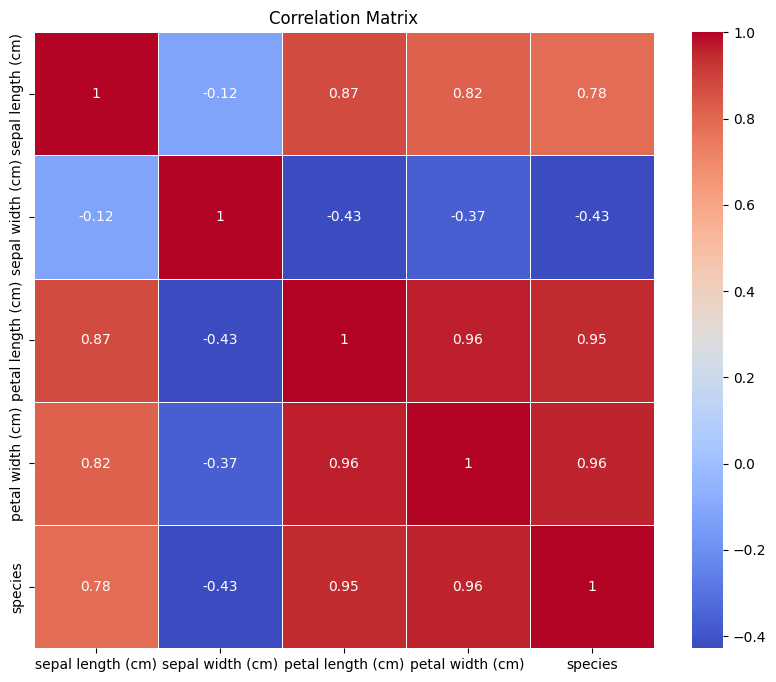

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.feature_selection import RFE   #feature selection
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=42)

In [ ]:
rfe = RFE(estimator=model,n_features_to_select=3)
rfe.fit(df.drop('species',axis=1),df['species'])

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=3)

In [ ]:
selected_features = df.drop('species',axis=1).columns[rfe.support_]
print(selected_features)

Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')


In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df.drop('species',axis=1))

In [ ]:
pca_transformed

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [ ]:
pca_columns = [f'PC{i+1}' for i in  range(pca_transformed.shape[1])]
pca_df = pd.DataFrame(pca_transformed,columns=pca_columns)
pca_df.head()

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [ ]:
labels = df['species']
X_train,X_test,y_train,y_test = train_test_split(pca_transformed,labels,test_size=0.2,random_state=42)

In [ ]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
lg.score(X_train,y_train)

0.9583333333333334

In [ ]:
lg.score(X_test,y_test)

1.0

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pca_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=2)),
    ('svc',SVC(kernel='linear'))
])

In [ ]:
pca_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('svc', SVC(kernel='linear'))])

In [ ]:
preds = pca_pipeline.predict([[5.1,3.5	,1.4,	0.2]])
preds

array([0])